<a href="https://colab.research.google.com/github/CrishmiCosta/HeartFailurePrediction/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Heart Failure Prediction Model**#

This will be a binary classification problem where we will be making a prediction on the target variable **HeartDisease**. 

We will be building a variety of Classification models and compare them to identify which model gives the best prediction on Heart Disease.

In [112]:
import numpy as np
import pandas as pd
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns

# Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score


##**Load Data**##

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/CrishmiCosta/HeartFailurePrediction/main/HFP-DataSets/heart.csv")
data.sample(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
794,50,M,NAP,129,196,0,Normal,163,N,0.0,Up,0
41,54,F,NAP,130,294,0,ST,100,Y,0.0,Flat,1
386,42,M,ASY,145,0,0,Normal,99,Y,0.0,Flat,1
685,61,M,ASY,120,260,0,Normal,140,Y,3.6,Flat,1
843,58,F,TA,150,283,1,LVH,162,N,1.0,Up,0
210,48,M,ASY,106,263,1,Normal,110,N,0.0,Flat,1
762,40,M,ASY,110,167,0,LVH,114,Y,2.0,Flat,1
861,65,M,ASY,110,248,0,LVH,158,N,0.6,Up,1
435,60,M,ASY,152,0,0,ST,118,Y,0.0,Up,0
737,57,M,ASY,152,274,0,Normal,88,Y,1.2,Flat,1


##**Exploratory Data Analysis**##

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
data.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
81,54,M,ATA,120,238,0,Normal,154,N,0.0,Up,0
758,51,M,TA,125,213,0,LVH,125,Y,1.4,Up,0
278,57,F,ASY,180,347,0,ST,126,Y,0.8,Flat,0
317,56,M,ASY,140,0,1,Normal,121,Y,1.8,Up,1
854,52,M,ATA,120,325,0,Normal,172,N,0.2,Up,0


In [6]:
data.size

11016

In [7]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
data.shape

(918, 12)

In [9]:
print(F"There is", data.shape[0], "observations and", data.shape[1], "columns in the dataset")

There is 918 observations and 12 columns in the dataset


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [13]:
data.describe(include = object).transpose()

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [14]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [15]:
data.isna()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

###**Examining the Variable 'HeartDisease'**##

1    508
0    410
Name: HeartDisease, dtype: int64
Percentage of Heart Disease: 55.34% (508 cases with Heart Disease)
Percentage of NOT Heart Disease: 44.66% (410 cases with no Heart Disease)


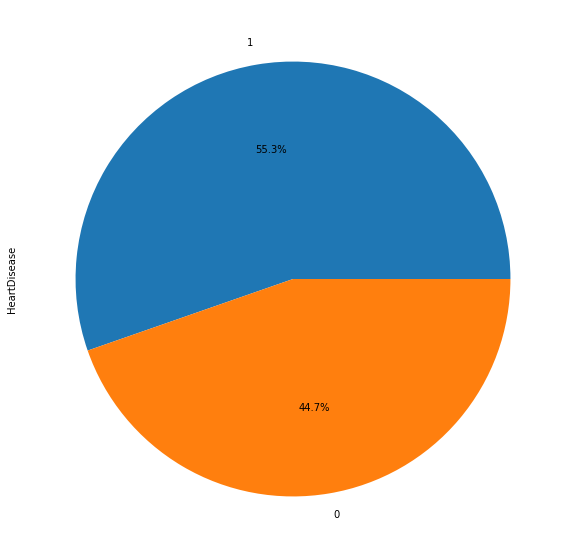

In [20]:
print(data["HeartDisease"].value_counts())
data["HeartDisease"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

y = data['HeartDisease']
print(F'Percentage of Heart Disease: {round(y.value_counts(normalize=True)[1]*100,2)}% ({y.value_counts()[1]} cases with Heart Disease)\nPercentage of NOT Heart Disease: {round(y.value_counts(normalize=True)[0]*100,2)}% ({y.value_counts()[0]} cases with no Heart Disease)')

In [21]:
data['HeartDisease'].describe()

count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64

Cases with no Heart Disease

In [47]:
data[data['HeartDisease']==0].describe().transpose().style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Age,410.000000,50.551220,9.444915,28.000000,43.000000,51.000000,57.000000,76.000000
RestingBP,410.000000,130.180488,16.499585,80.000000,120.000000,130.000000,140.000000,190.000000
Cholesterol,410.000000,227.121951,74.634659,0.000000,197.250000,227.000000,266.750000,564.000000
FastingBS,410.000000,0.107317,0.309894,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,410.000000,148.151220,23.288067,69.000000,134.000000,150.000000,165.000000,202.000000
Oldpeak,410.000000,0.408049,0.699709,-1.100000,0.000000,0.000000,0.600000,4.200000
HeartDisease,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


**Cases with Heart Disease**

In [48]:
data[data['HeartDisease']==1].describe().transpose().style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Age,508.000000,55.899606,8.727056,31.000000,51.000000,57.000000,62.000000,77.000000
RestingBP,508.000000,134.185039,19.828685,0.000000,120.000000,132.000000,145.000000,200.000000
Cholesterol,508.000000,175.940945,126.391398,0.000000,0.000000,217.000000,267.000000,603.000000
FastingBS,508.000000,0.334646,0.472332,0.000000,0.000000,0.000000,1.000000,1.000000
MaxHR,508.000000,127.655512,23.386923,60.000000,112.000000,126.000000,144.250000,195.000000
Oldpeak,508.000000,1.274213,1.151872,-2.600000,0.000000,1.200000,2.000000,6.200000
HeartDisease,508.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
print(F"Skewness: {data['HeartDisease'].skew()}")

Skewness: -0.21508633825088655


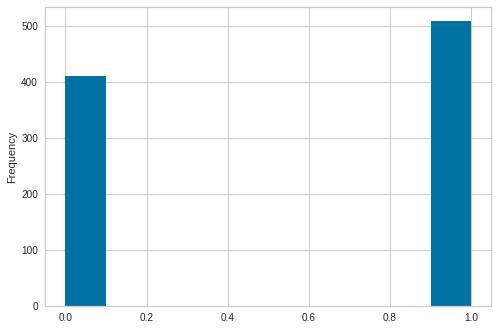

In [231]:
data['HeartDisease'].plot(kind='hist')

**Spliting Dataset into numeric & categoric features**

In [42]:
numerical= data.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

categorical = data.select_dtypes('object').columns

print(F"Numerical Columns:  {data[numerical].columns}")
print('\n')
print(F"Categorical Columns: {data[categorical].columns}")

Numerical Columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')


Categorical Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


**Examining Numerical Features**

In [43]:
data[numerical].head().transpose()

,0,1,2,3,4
Age,40.0,49.0,37.0,48.0,54.0
RestingBP,140.0,160.0,130.0,138.0,150.0
Cholesterol,289.0,180.0,283.0,214.0,195.0
FastingBS,0.0,0.0,0.0,0.0,0.0
MaxHR,172.0,156.0,98.0,108.0,122.0
Oldpeak,0.0,1.0,0.0,1.5,0.0


In [45]:
data[numerical].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


In [46]:
data[numerical].describe().transpose().style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000


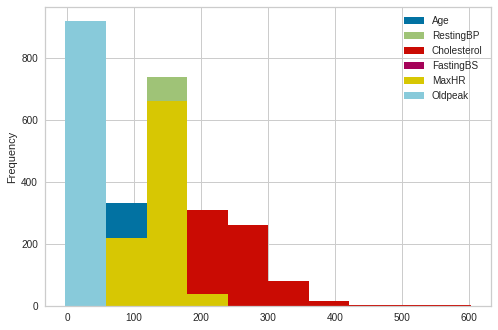

In [232]:
data[numerical].plot(kind='hist');

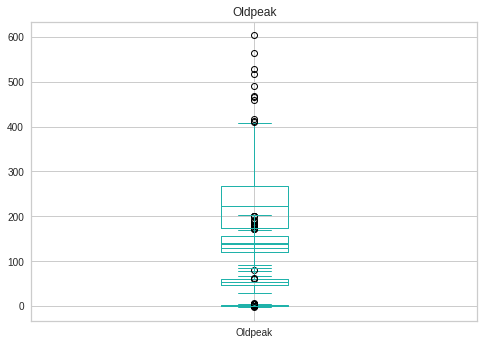

In [237]:
for i in numerical:
    data[i].plot(kind="box", title=i, color='lightseagreen')

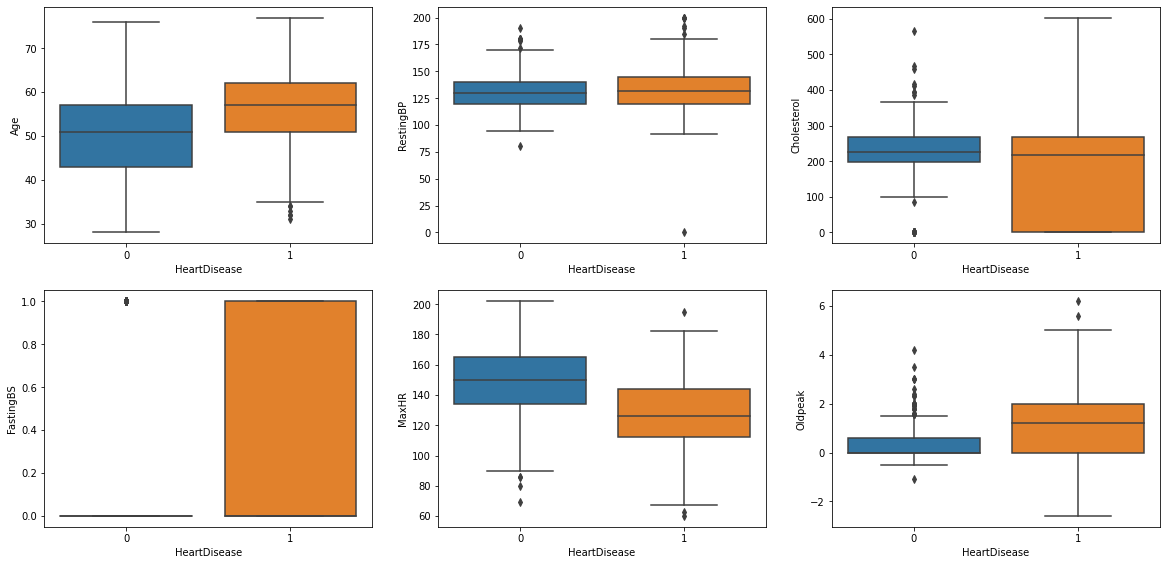

In [56]:
index = 0
plt.figure(figsize=(20,20))
for feature in numerical:
    if feature != "HeartDisease":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='HeartDisease', y=feature, data=data)

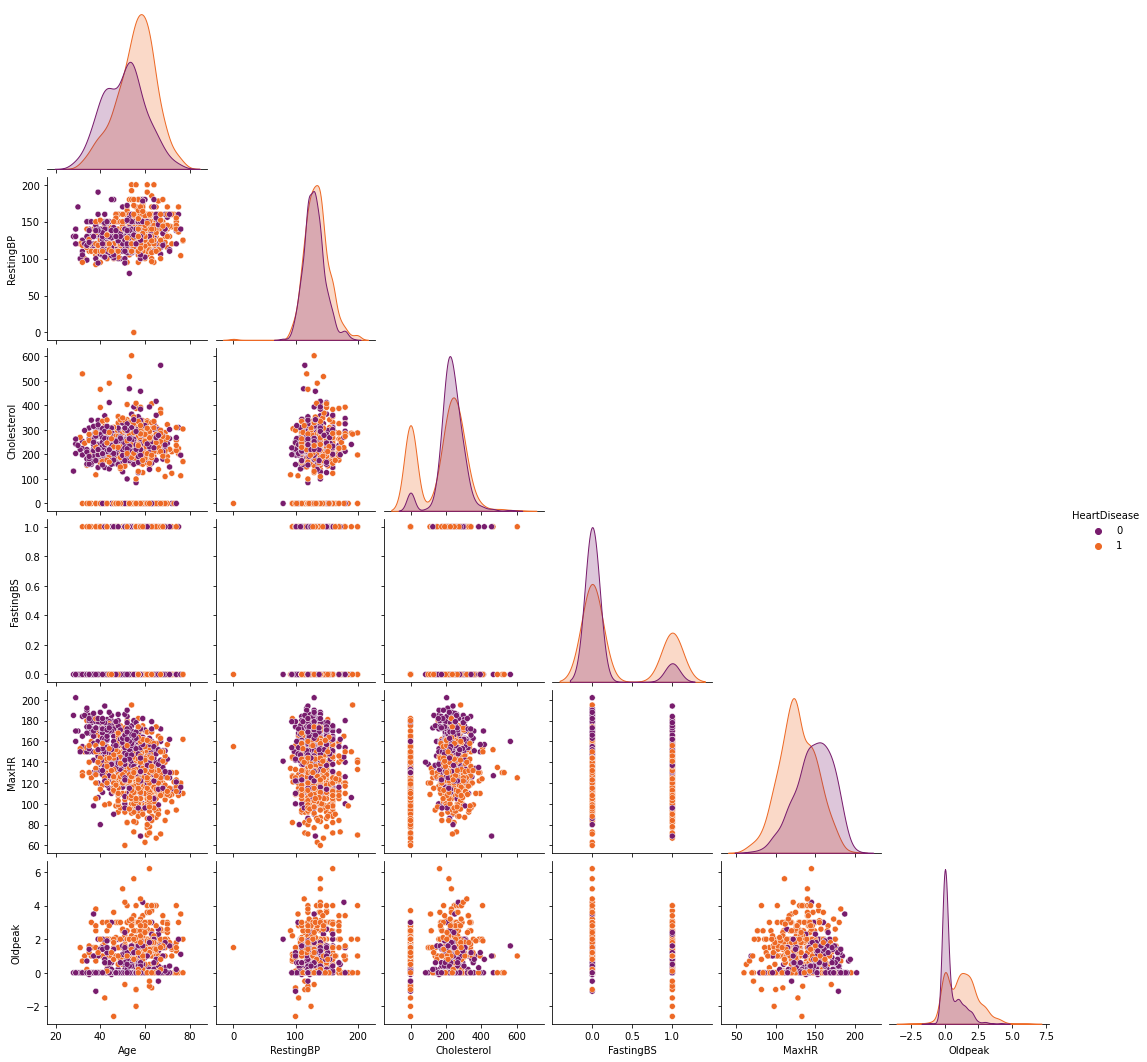

In [60]:
sns.pairplot(data, hue="HeartDisease", palette="inferno", corner=True);

In [61]:
skew_vals = data.skew().sort_values(ascending=False)
skew_vals

FastingBS       1.264484
Oldpeak         1.022872
RestingBP       0.179839
MaxHR          -0.144359
Age            -0.195933
HeartDisease   -0.215086
Cholesterol    -0.610086
dtype: float64

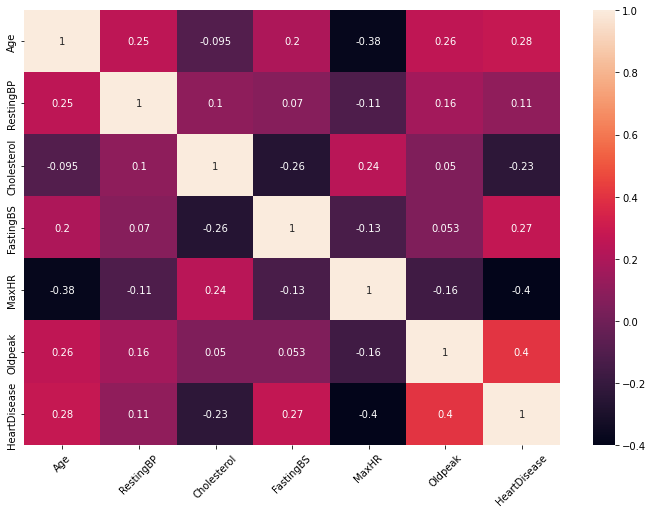

In [63]:
# Analyzing correlation amoung variables using a heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True)
plt.xticks(rotation=45);

**Examining Numerical Variables**

In [64]:
data[categorical].head().transpose()

,0,1,2,3,4
Sex,M,F,M,F,M
ChestPainType,ATA,NAP,ATA,ASY,NAP
RestingECG,Normal,Normal,ST,Normal,Normal
ExerciseAngina,N,N,N,Y,N
ST_Slope,Up,Flat,Up,Flat,Up


In [65]:
data[categorical].describe()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


**Sex & HeartDisease**

In [69]:
data["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

29.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



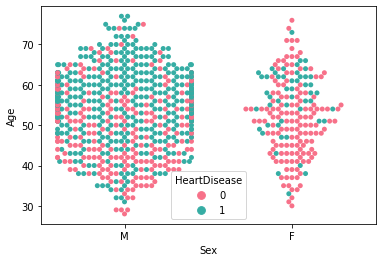

In [73]:
sns.swarmplot(y="Age", x="Sex", hue="HeartDisease", data=data, palette="husl");

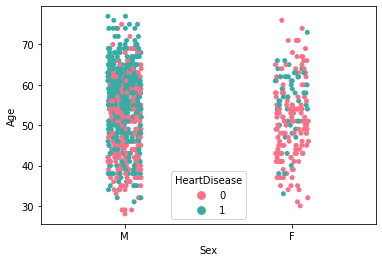

In [74]:
sns.stripplot(y="Age", x="Sex", hue="HeartDisease", data=data, palette="husl");

**ChestPain & HeartDisease**

In [75]:
data["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

44.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



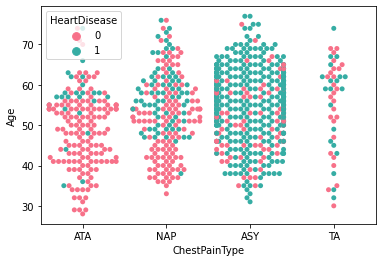

In [77]:
sns.swarmplot(y="Age", x="ChestPainType", hue="HeartDisease", data=data, palette="husl");

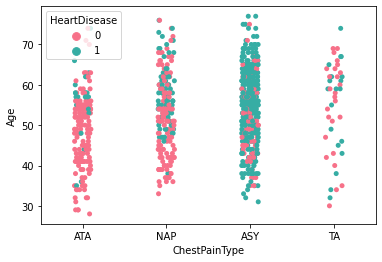

In [79]:
sns.stripplot(y="Age", x="ChestPainType", hue="HeartDisease", data=data, palette="husl");

**RestingECG and HeartDisease**

In [80]:
data["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

33.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



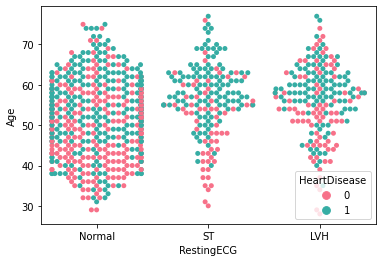

In [82]:
sns.swarmplot(y="Age", x="RestingECG", hue="HeartDisease", data=data, palette="husl");

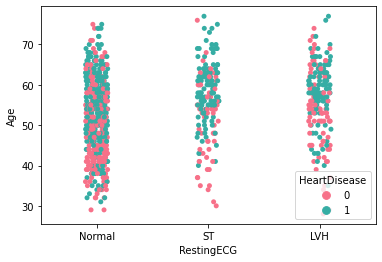

In [83]:
sns.stripplot(y="Age", x="RestingECG", hue="HeartDisease", data=data, palette="husl");

**ExerciseAngina and HeartDisease**

In [84]:
data["ExerciseAngina"].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

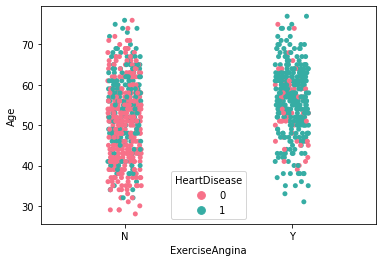

In [86]:
sns.stripplot(y="Age", x="ExerciseAngina", hue="HeartDisease", data=data, palette="husl");

**ST_Slope and HeartDisease**

In [87]:
data["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

16.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



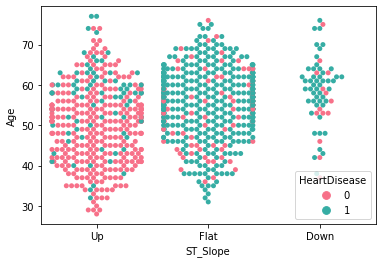

In [89]:
sns.swarmplot(y="Age", x="ST_Slope", hue="HeartDisease", data=data, palette="husl");

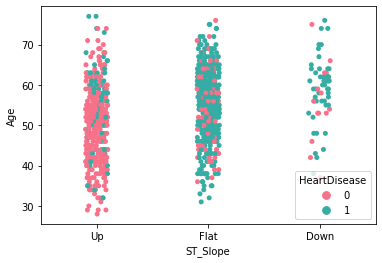

In [90]:
sns.stripplot(y="Age", x="ST_Slope", hue="HeartDisease", data=data, palette="husl");

**Dummy Variables Operation**

In [91]:
data.shape

(918, 12)

In [92]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [93]:
data[categorical].value_counts()

Sex  ChestPainType  RestingECG  ExerciseAngina  ST_Slope
M    ASY            Normal      Y               Flat        109
     ATA            Normal      N               Up           64
     ASY            Normal      N               Flat         55
                    ST          Y               Flat         49
     NAP            Normal      N               Up           46
                                                           ... 
F    TA             Normal      N               Down          1
     NAP            Normal      Y               Flat          1
                                                Up            1
                    ST          N               Flat          1
M    TA             ST          Y               Flat          1
Length: 95, dtype: int64

In [94]:
data = pd.get_dummies(data, drop_first=True)

In [95]:
data.shape

(918, 16)

In [96]:
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


##**Train-Test Split**##

In [97]:
X = data.drop(["HeartDisease"], axis=1)
y = data["HeartDisease"]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify = y, random_state = 101)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 780
Test sample size  = 138


**Missing Values**

In [100]:
# Function for determining the number and percentages of missing values

def missing (data):
    missing_number = data.isnull().sum().sort_values(ascending=False)
    missing_percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(data)

,Missing_Number,Missing_Percent
ST_Slope_Up,0,0.0
ST_Slope_Flat,0,0.0
ExerciseAngina_Y,0,0.0
RestingECG_ST,0,0.0
RestingECG_Normal,0,0.0
ChestPainType_TA,0,0.0
ChestPainType_NAP,0,0.0
ChestPainType_ATA,0,0.0
Sex_M,0,0.0
HeartDisease,0,0.0


It can be concluded that there are no missing values in our dataset.

##**Feature Scaling (Normalization)**##

In [106]:
from sklearn.preprocessing import MinMaxScaler

In [109]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [110]:
X_train_scaled = scaler.fit_transform(X_train)

In [111]:
X_test_scaled = scaler.transform(X_test)

**General Insights**

In [113]:
# General Insights

def model_first_insight(X_train, y_train, class_weight, solver='liblinear'):

    # Logistic Regression
    log = LogisticRegression(random_state=101, class_weight=class_weight)
    log.fit(X_train, y_train)
    
    # Decision Tree
    decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=101, class_weight=class_weight)
    decision_tree.fit(X_train, y_train)
   
    # Random Forest
    random_forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=101, class_weight=class_weight)
    random_forest.fit(X_train, y_train)
    
    # KNN
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, y_train) 
    
    # Model Accuracy on Training Data
    print(F"\033[1m1) Logistic Regression Training Accuracy:\033[0m {log.score(X_train, y_train)}")
    print(F"\033[1m3) Decision Tree Training Accuracy:\033[0m {decision_tree.score(X_train, y_train)}")
    print(F"\033[1m4) Random Forest Training Accuracy:\033[0m {random_forest.score(X_train, y_train)}")
    print(F"\033[1m5) KNN Training Accuracy:\033[0m {knn.score(X_train, y_train)}")
    
    return log, decision_tree, random_forest, knn

In [114]:
def models(X_train, y_train, class_weight):
    
    # Logistic Regression
    log = LogisticRegression(random_state=101, class_weight=class_weight, solver='liblinear')
    log.fit(X_train, y_train)
    
    # Decision Tree
    decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=101, class_weight=class_weight)
    decision_tree.fit(X_train, y_train)
    
    # Random Forest
    random_forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=101, class_weight=class_weight)
    random_forest.fit(X_train, y_train)

    # KNN
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, y_train) 
    
    # Model Accuracy on Training Data
    print(f"\033[1m1) Logistic Regression Training Accuracy:\033[0m {log}")
    print(f"\033[1m3) Decision Tree Training Accuracy:\033[0m {decision_tree}")
    print(f"\033[1m4) Random Forest Training Accuracy:\033[0m {random_forest}")
    print(f"\033[1m5) KNN Training Accuracy:\033[0m {knn}")
  
    return log.score(X_train, y_train), decision_tree.score(X_train, y_train), random_forest.score(X_train, y_train),knn.score(X_train, y_train)

In [115]:
def models_accuracy(X_Set, y_Set):    
    Scores = pd.DataFrame(columns = ["LR_Acc", "DT_Acc", "RF_Acc", "KNN_Acc"])

    print("\033[1mBASIC ACCURACY\033[0m")
    Basic = [log_acc, decision_tree_acc, random_forest_acc, knn_acc] = models(X_train, y_train, None)
    Scores.loc[0] = Basic

    print("\n\033[1mSCALED ACCURACY WITHOUT BALANCED\033[0m")    
    Scaled = [log_acc, decision_tree_acc, random_forest_acc, knn_acc] = models(X_train_scaled, y_train, None)
    Scores.loc[1] = Scaled

    
    print("\n\033[1mBASIC ACCURACY WITH BALANCED\033[0m")
    Balanced = [log_acc, decision_tree_acc, random_forest_acc, knn_acc] = models(X_train, y_train, "balanced")
    Scores.loc[2] = Balanced

    print("\n\033[1mSCALED ACCURACY WITH BALANCED\033[0m")    
    Scaled_Balanced = [log_acc, decision_tree_acc, random_forest_acc, knn_acc] = models(X_train_scaled, y_train, "balanced")
    Scores.loc[3] = Scaled_Balanced

    Scores.set_axis(['Basic', 'Scaled', 'Balanced', 'Scaled_Balanced'], axis='index', inplace=True)

    return Scores.style.applymap(lambda x: "background-color: pink" if x<0.6 or x == 1 else "background-color: lightgreen")\
                       .applymap(lambda x: 'opacity: 40%;' if (x < 0.8) else None)\
                       .applymap(lambda x: 'color: red' if x == 1 or x <=0.8 else 'color: darkblue')

In [116]:
models_accuracy(X_train, y_train)

BASIC ACCURACY
1) Logistic Regression Training Accuracy: LogisticRegression(random_state=101, solver='liblinear')
3) Decision Tree Training Accuracy: DecisionTreeClassifier(criterion='entropy', random_state=101)
4) Random Forest Training Accuracy: RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=101)
5) KNN Training Accuracy: KNeighborsClassifier(n_neighbors=3)

SCALED ACCURACY WITHOUT BALANCED
1) Logistic Regression Training Accuracy: LogisticRegression(random_state=101, solver='liblinear')
3) Decision Tree Training Accuracy: DecisionTreeClassifier(criterion='entropy', random_state=101)
4) Random Forest Training Accuracy: RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=101)
5) KNN Training Accuracy: KNeighborsClassifier(n_neighbors=3)

BASIC ACCURACY WITH BALANCED
1) Logistic Regression Training Accuracy: LogisticRegression(class_weight='balanced', random_state=101,
                   solver='liblinear')
3) Decision Tree Training Accu

,LR_Acc,DT_Acc,RF_Acc,KNN_Acc
Basic,0.870513,1.000000,0.989744,0.833333
Scaled,0.861538,1.000000,0.989744,0.910256
Balanced,0.865385,1.000000,0.997436,0.833333
Scaled_Balanced,0.866667,1.000000,0.997436,0.910256


In [117]:
Scores = pd.DataFrame(columns = ["LR_Acc", "DT_Acc", "RF_Acc", "KNN_Acc"])

print("\033[1mBASIC ACCURACY\033[0m")
Basic = [log_acc, decision_tree_acc, random_forest_acc, knn_acc] = models(X_train, y_train, None)
Scores.loc[0] = Basic

print("\n\033[1mSCALED ACCURACY WITHOUT BALANCED\033[0m")    
Scaled = [log_acc, decision_tree_acc, random_forest_acc, knn_acc] = models(X_train_scaled, y_train, None)
Scores.loc[1] = Scaled

print("\n\033[1mBASIC ACCURACY WITH BALANCED\033[0m")
Balanced = [log_acc, decision_tree_acc, random_forest_acc, knn_acc] = models(X_train, y_train, "balanced")
Scores.loc[2] = Balanced

print("\n\033[1mSCALED ACCURACY WITH BALANCED\033[0m")    
Scaled_Balanced = [log_acc, decision_tree_acc, random_forest_acc, knn_acc] = models(X_train_scaled, y_train, "balanced")
Scores.loc[3] = Scaled_Balanced

Scores.set_axis(['Basic', 'Scaled', 'Balanced', 'Scaled_Balanced'], axis='index', inplace=True)

BASIC ACCURACY
1) Logistic Regression Training Accuracy: LogisticRegression(random_state=101, solver='liblinear')
3) Decision Tree Training Accuracy: DecisionTreeClassifier(criterion='entropy', random_state=101)
4) Random Forest Training Accuracy: RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=101)
5) KNN Training Accuracy: KNeighborsClassifier(n_neighbors=3)

SCALED ACCURACY WITHOUT BALANCED
1) Logistic Regression Training Accuracy: LogisticRegression(random_state=101, solver='liblinear')
3) Decision Tree Training Accuracy: DecisionTreeClassifier(criterion='entropy', random_state=101)
4) Random Forest Training Accuracy: RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=101)
5) KNN Training Accuracy: KNeighborsClassifier(n_neighbors=3)

BASIC ACCURACY WITH BALANCED
1) Logistic Regression Training Accuracy: LogisticRegression(class_weight='balanced', random_state=101,
                   solver='liblinear')
3) Decision Tree Training Accu

In [118]:
accuracy_scores = Scores.style.applymap(lambda x: "background-color: pink" if x<0.6 or x == 1 else "background-color: lightgreen")\
                              .applymap(lambda x: 'opacity: 40%;' if (x < 0.8) else None)\
                              .applymap(lambda x: 'color: red' if x == 1 or x <=0.8 else 'color: darkblue')

accuracy_scores

,LR_Acc,DT_Acc,RF_Acc,KNN_Acc
Basic,0.870513,1.000000,0.989744,0.833333
Scaled,0.861538,1.000000,0.989744,0.910256
Balanced,0.865385,1.000000,0.997436,0.833333
Scaled_Balanced,0.866667,1.000000,0.997436,0.910256


**Handling with Skewness**

In [119]:
accuracy_scores

,LR_Acc,DT_Acc,RF_Acc,KNN_Acc
Basic,0.870513,1.000000,0.989744,0.833333
Scaled,0.861538,1.000000,0.989744,0.910256
Balanced,0.865385,1.000000,0.997436,0.833333
Scaled_Balanced,0.866667,1.000000,0.997436,0.910256


In [121]:
from sklearn.preprocessing import PowerTransformer

operations = [("scaler", MinMaxScaler()), ("power", PowerTransformer()), ("log", LogisticRegression(random_state=101))]

In [123]:
# Defining the pipeline object for LogisticClassifier
from sklearn.pipeline import Pipeline

pipe_log_model = Pipeline(steps=operations)

In [124]:
pipe_log_model.get_params()

{'log': LogisticRegression(random_state=101),
 'log__C': 1.0,
 'log__class_weight': None,
 'log__dual': False,
 'log__fit_intercept': True,
 'log__intercept_scaling': 1,
 'log__l1_ratio': None,
 'log__max_iter': 100,
 'log__multi_class': 'auto',
 'log__n_jobs': None,
 'log__penalty': 'l2',
 'log__random_state': 101,
 'log__solver': 'lbfgs',
 'log__tol': 0.0001,
 'log__verbose': 0,
 'log__warm_start': False,
 'memory': None,
 'power': PowerTransformer(),
 'power__copy': True,
 'power__method': 'yeo-johnson',
 'power__standardize': True,
 'scaler': MinMaxScaler(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'steps': [('scaler', MinMaxScaler()),
  ('power', PowerTransformer()),
  ('log', LogisticRegression(random_state=101))],
 'verbose': False}

In [125]:
pipe_log_model.fit(X_train, y_train)
y_pred = pipe_log_model.predict(X_test)
y_train_pred = pipe_log_model.predict(X_train)

In [126]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[52 10]
 [ 7 69]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        62
           1       0.87      0.91      0.89        76

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138



As observed, we can conclude that handling with skewness does not make any contribution to our model when compared to the observations made with LogisticClassifier without PowerTransform. 

Hence, we will proceed the next steps of our project without handling with skewnewss as it has not much of an impact on the final results.

In [129]:
from sklearn.model_selection import cross_validate

pipe_scores = cross_validate(pipe_log_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
data_pipe_scores = pd.DataFrame(pipe_scores, index = range(1, 11))

data_pipe_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.056060,0.009897,0.794872,0.787234,0.860465,0.822222
2,0.076671,0.009306,0.820513,0.822222,0.860465,0.840909
3,0.070178,0.008978,0.884615,0.886364,0.906977,0.896552
4,0.075907,0.009291,0.833333,0.875000,0.813953,0.843373
5,0.070025,0.009233,0.897436,0.888889,0.930233,0.909091
6,0.078870,0.009256,0.820513,0.822222,0.860465,0.840909
7,0.081014,0.009232,0.871795,0.851064,0.930233,0.888889
8,0.073434,0.020811,0.833333,0.826087,0.883721,0.853933
9,0.081103,0.009304,0.833333,0.878049,0.818182,0.847059
10,0.069893,0.009245,0.923077,0.913043,0.954545,0.933333


In [130]:
data_pipe_scores.mean()[2:]

test_accuracy     0.851282
test_precision    0.855017
test_recall       0.881924
test_f1           0.867627
dtype: float64

In [133]:
# Evaluate the pipeline

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score


cv = RepeatedStratifiedKFold(n_splits=10, random_state=101)
n_scores = cross_val_score(pipe_log_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print(F'Accuracy: Results Mean : %{round(n_scores.mean()*100,3)}, Results Standard Deviation : {round(n_scores.std()*100,3)}')

Accuracy: Results Mean : %85.75, Results Standard Deviation : 3.228


In [134]:
print('Accuracy: %.3f (%.3f)' % (n_scores.mean(), n_scores.std()))

Accuracy: 0.858 (0.032)


##**Modeling & Model Performance**##

###**1. Logistic Regression**###

In [135]:
accuracy_scores

,LR_Acc,DT_Acc,RF_Acc,KNN_Acc
Basic,0.870513,1.000000,0.989744,0.833333
Scaled,0.861538,1.000000,0.989744,0.910256
Balanced,0.865385,1.000000,0.997436,0.833333
Scaled_Balanced,0.866667,1.000000,0.997436,0.910256


**Modelling Logistic Regression with Default Parameters**

In [137]:
# Function for examining scores

def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

[[51 11]
 [ 6 70]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.82      0.86        62
           1       0.86      0.92      0.89        76

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138

--------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



,train_set,test_set
Accuracy,0.861538,0.876812
Precision,0.866516,0.864198
Recall,0.886574,0.921053
f1,0.876430,0.891720


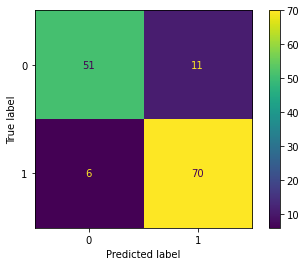

In [138]:
LR_model = LogisticRegression() # Since Basic accuracy outcome gives the best model accuracy results, we will implement it 
LR_model.fit(X_train_scaled, y_train)
y_pred = LR_model.predict(X_test_scaled)
y_train_pred = LR_model.predict(X_train_scaled)

log_f1 = f1_score(y_test, y_pred)
log_acc = accuracy_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(LR_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

In [139]:
y_pred_proba = LR_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.05076976, 0.94923024],
       [0.04870887, 0.95129113],
       [0.14385456, 0.85614544],
       [0.92875297, 0.07124703],
       [0.71116151, 0.28883849],
       [0.15237434, 0.84762566],
       [0.15120876, 0.84879124],
       [0.42870686, 0.57129314],
       [0.44449083, 0.55550917],
       [0.81621359, 0.18378641],
       [0.03653746, 0.96346254],
       [0.10809954, 0.89190046],
       [0.10442966, 0.89557034],
       [0.91311669, 0.08688331],
       [0.11643435, 0.88356565],
       [0.06681484, 0.93318516],
       [0.07004074, 0.92995926],
       [0.10902775, 0.89097225],
       [0.34616094, 0.65383906],
       [0.51035142, 0.48964858],
       [0.91816183, 0.08183817],
       [0.01911985, 0.98088015],
       [0.04477097, 0.95522903],
       [0.94102715, 0.05897285],
       [0.17281261, 0.82718739],
       [0.97639215, 0.02360785],
       [0.26934403, 0.73065597],
       [0.22676553, 0.77323447],
       [0.25401111, 0.74598889],
       [0.97038495, 0.02961505],
       [0.

In [140]:
test_data = pd.concat([X_test.set_index(y_test.index), y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease,pred,pred_proba
171,40,140,235,0,188,0.0,1,0,1,0,1,0,0,0,1,0,0,0.058973
767,54,108,267,0,167,0.0,0,0,1,0,0,0,0,0,1,0,0,0.025233
186,58,130,251,0,110,0.0,1,1,0,0,1,0,0,0,1,0,0,0.085698
462,59,122,233,0,117,1.3,1,0,0,0,1,0,1,0,0,1,1,0.821375
439,74,138,0,0,116,0.2,1,0,1,0,1,0,0,0,1,0,0,0.228293
848,52,128,255,0,161,0.0,1,0,0,0,1,0,1,0,1,1,0,0.489649
187,41,120,237,1,138,1.0,1,0,0,0,1,0,1,1,0,1,1,0.968648
355,67,145,0,0,125,0.0,1,0,0,1,0,0,0,1,0,1,1,0.773234
685,61,120,260,0,140,3.6,1,0,0,0,1,0,1,1,0,1,1,0.960040
500,65,136,248,0,140,4.0,1,0,0,0,1,0,1,0,0,1,1,0.890972


**Cross-Validating Logistic Regression Model**

In [141]:
log_xvalid_model = LogisticRegression()

log_xvalid_model_scores = cross_validate(log_xvalid_model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                          'f1'], cv = 10)
log_xvalid_model_scores = pd.DataFrame(log_xvalid_model_scores, index = range(1, 11))

log_xvalid_model_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.014257,0.004831,0.807692,0.791667,0.883721,0.835165
2,0.015163,0.004735,0.820513,0.822222,0.860465,0.840909
3,0.015869,0.004699,0.871795,0.883721,0.883721,0.883721
4,0.016182,0.004816,0.833333,0.875000,0.813953,0.843373
5,0.017654,0.005028,0.910256,0.891304,0.953488,0.921348
6,0.014400,0.004838,0.833333,0.840909,0.860465,0.850575
7,0.017416,0.004837,0.871795,0.851064,0.930233,0.888889
8,0.015783,0.004859,0.846154,0.829787,0.906977,0.866667
9,0.015277,0.004846,0.833333,0.897436,0.795455,0.843373
10,0.015710,0.004792,0.935897,0.914894,0.977273,0.945055


In [142]:
log_xvalid_model_scores.mean()[2:]

test_accuracy     0.856410
test_precision    0.859800
test_recall       0.886575
test_f1           0.871908
dtype: float64

**Modelling Logistic Regression with Best Parameters Using GridSearchCV**

In [143]:
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)

param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C" : C}

In [145]:
from sklearn.model_selection import GridSearchCV

LR_grid_model = LogisticRegression(solver='saga', max_iter=5000, class_weight = "balanced")

LR_grid_model = GridSearchCV(LR_grid_model, param_grid = param_grid)

In [ ]:
LR_grid_model.fit(X_train_scaled, y_train)

[[53  9]
 [ 8 68]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        62
           1       0.88      0.89      0.89        76

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.88       138
weighted avg       0.88      0.88      0.88       138

--------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



,train_set,test_set
Accuracy,0.867949,0.876812
Precision,0.885246,0.883117
Recall,0.875000,0.894737
f1,0.880093,0.888889


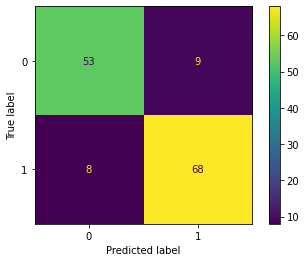

In [147]:
y_pred = LR_grid_model.predict(X_test_scaled)
y_train_pred = LR_grid_model.predict(X_train_scaled)

log_grid_f1 = f1_score(y_test, y_pred)
log_grid_acc = accuracy_score(y_test, y_pred)
log_grid_recall = recall_score(y_test, y_pred)
log_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(LR_grid_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

**ROC (Receiver Operating Curve) and AUC (Area Under Curve)**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



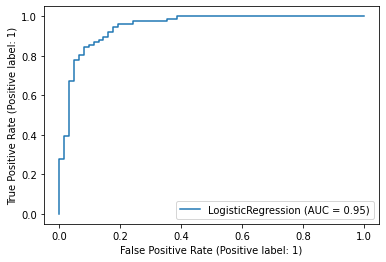

In [148]:
plot_roc_curve(LR_model, X_test_scaled, y_test, response_method='auto');

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



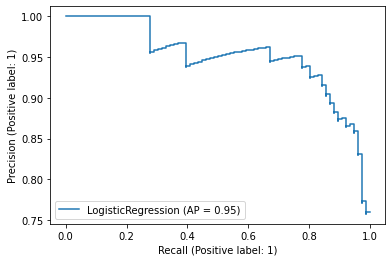

In [149]:
plot_precision_recall_curve(LR_model, X_test_scaled, y_test);

**The Determination of The Optimal Treshold**

In [150]:
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

In [151]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.4841659373541868

In [153]:
roc_curve = {"fp_rate":fp_rate, "tp_rate":tp_rate, "thresholds":thresholds}
data_roc_curve = pd.DataFrame(roc_curve)
data_roc_curve

,fp_rate,tp_rate,thresholds
0,0.000000,0.000000,1.982393
1,0.000000,0.013158,0.982393
2,0.000000,0.276316,0.948860
3,0.016129,0.276316,0.946590
4,0.016129,0.394737,0.914722
5,0.032258,0.394737,0.909225
6,0.032258,0.671053,0.825132
7,0.048387,0.671053,0.823378
8,0.048387,0.776316,0.767226
9,0.064516,0.776316,0.766785


In [154]:
data_roc_curve.iloc[optimal_idx]

fp_rate       0.177419
tp_rate       0.947368
thresholds    0.484166
Name: 24, dtype: float64

###**2. Decision-Tree Classifier**###

In [155]:
accuracy_scores

,LR_Acc,DT_Acc,RF_Acc,KNN_Acc
Basic,0.870513,1.000000,0.989744,0.833333
Scaled,0.861538,1.000000,0.989744,0.910256
Balanced,0.865385,1.000000,0.997436,0.833333
Scaled_Balanced,0.866667,1.000000,0.997436,0.910256


**Modelling Decision Tree with Default Parameters**

[[43 19]
 [18 58]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.69      0.70        62
           1       0.75      0.76      0.76        76

    accuracy                           0.73       138
   macro avg       0.73      0.73      0.73       138
weighted avg       0.73      0.73      0.73       138

--------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



,train_set,test_set
Accuracy,1.0,0.731884
Precision,1.0,0.753247
Recall,1.0,0.763158
f1,1.0,0.758170


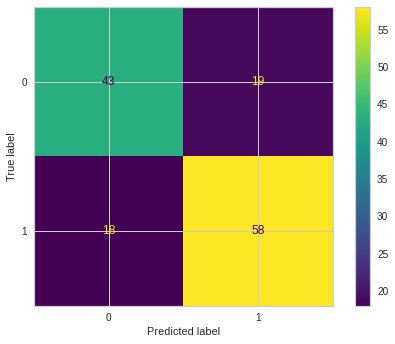

In [168]:
DT_model = DecisionTreeClassifier(class_weight="balanced", random_state=42)
DT_model.fit(X_train_scaled, y_train)
y_pred = DT_model.predict(X_test_scaled)
y_train_pred = DT_model.predict(X_train_scaled)

dt_f1 = f1_score(y_test, y_pred)
dt_acc = accuracy_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(DT_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

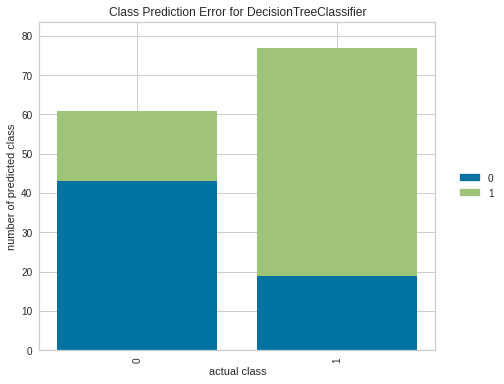

In [169]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.poof();

**Cross-Validating Decision Tree**

In [170]:
dt_xvalid_model = DecisionTreeClassifier(max_depth=None, random_state=42)

dt_xvalid_model_scores = cross_validate(dt_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
dt_xvalid_model_scores = pd.DataFrame(dt_xvalid_model_scores, index = range(1, 11))

dt_xvalid_model_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.005944,0.003453,0.769231,0.820513,0.744186,0.780488
2,0.003298,0.003135,0.782051,0.782609,0.837209,0.808989
3,0.003547,0.003093,0.756410,0.852941,0.674419,0.753247
4,0.003181,0.003120,0.666667,0.673469,0.767442,0.717391
5,0.003236,0.003086,0.769231,0.878788,0.674419,0.763158
6,0.003267,0.003408,0.717949,0.744186,0.744186,0.744186
7,0.003531,0.003005,0.794872,0.800000,0.837209,0.818182
8,0.003209,0.003111,0.782051,0.795455,0.813953,0.804598
9,0.003000,0.003088,0.769231,0.861111,0.704545,0.775000
10,0.003187,0.003021,0.884615,0.888889,0.909091,0.898876


In [171]:
dt_xvalid_model_scores.mean()[2:]

test_accuracy     0.769231
test_precision    0.809796
test_recall       0.770666
test_f1           0.786411
dtype: float64

**Modelling Decision Tree with Best Parameters Using GridSeachCV**

In [172]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],
              "max_depth": [None, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [2, 3, 5],
              "min_samples_split": [2, 3, 5, 7, 9, 15]}

In [173]:
DT_grid_model = DecisionTreeClassifier(class_weight = "balanced", random_state=42)

DT_grid_model = GridSearchCV(estimator=DT_grid_model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


In [174]:
print(colored('\033[1mBest Parameters of GridSearchCV for Decision Tree Model:\033[0m', 'blue'), colored(DT_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for Decision Tree Model:\033[0m', 'blue'), colored(DT_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for Decision Tree Model: {'max_depth': 7, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 9, 'splitter': 'random'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for Decision Tree Model: DecisionTreeClassifier(class_weight='balanced', max_depth=7, max_features=7,
                       min_samples_leaf=3, min_samples_split=9, random_state=42,
                       splitter='random')


Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
[[49 13]
 [ 8 68]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        62
           1       0.84      0.89      0.87        76

    accuracy                           0.85       138
   macro avg       0.85      0.84      0.84       138
weighted avg       0.85      0.85      0.85       138

--------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



,train_set,test_set
Accuracy,0.879487,0.847826
Precision,0.878924,0.839506
Recall,0.907407,0.894737
f1,0.892938,0.866242


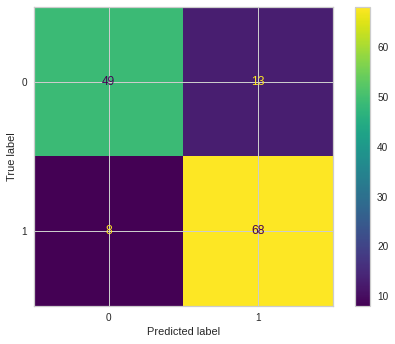

In [175]:
DT_grid_model.fit(X_train_scaled, y_train)
y_pred = DT_grid_model.predict(X_test_scaled)

y_train_pred = DT_grid_model.predict(X_train_scaled)

dt_grid_f1 = f1_score(y_test, y_pred)
dt_grid_acc = accuracy_score(y_test, y_pred)
dt_grid_recall = recall_score(y_test, y_pred)
dt_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(DT_grid_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

**Feature Importance for Decision Tree Model**

In [176]:
DT_model.feature_importances_

array([0.06666223, 0.0826702 , 0.13219174, 0.02816061, 0.12614699,
       0.06645499, 0.02719402, 0.00839559, 0.02680743, 0.        ,
       0.01774024, 0.00424299, 0.03420438, 0.01015882, 0.36896978])

In [177]:
DT_feature_imp = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
DT_feature_imp

,Feature Importance
ChestPainType_TA,0.000000
RestingECG_ST,0.004243
ChestPainType_ATA,0.008396
ST_Slope_Flat,0.010159
RestingECG_Normal,0.017740
ChestPainType_NAP,0.026807
Sex_M,0.027194
FastingBS,0.028161
ExerciseAngina_Y,0.034204
Oldpeak,0.066455


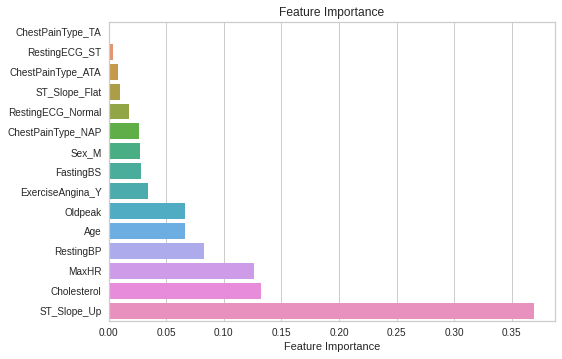

In [178]:
sns.barplot(x=DT_feature_imp["Feature Importance"], y=DT_feature_imp.index)
plt.title("Feature Importance")
plt.show()

As the feature that weighs too much on the estimation can cause overfitting. We will drop the most important feature and check the scores again to see what happens.

In [180]:
X1 = X.drop(columns = ["ST_Slope_Up"])
y1 = data["HeartDisease"]

In [181]:
X1.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Flat'],
      dtype='object')

In [182]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.15, random_state=42)

[[46 10]
 [18 64]]
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        56
           1       0.86      0.78      0.82        82

    accuracy                           0.80       138
   macro avg       0.79      0.80      0.79       138
weighted avg       0.81      0.80      0.80       138

[[46 10]
 [18 64]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        56
           1       0.86      0.78      0.82        82

    accuracy                           0.80       138
   macro avg       0.79      0.80      0.79       138
weighted avg       0.81      0.80      0.80       138

--------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



,train_set,test_set
Accuracy,1.0,0.797101
Precision,1.0,0.864865
Recall,1.0,0.780488
f1,1.0,0.820513


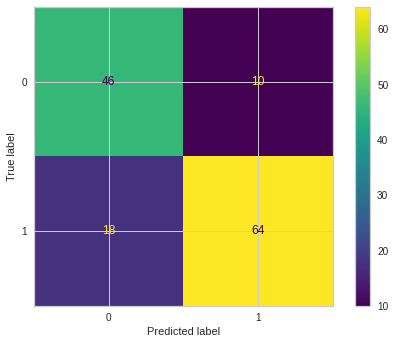

In [183]:
operations = [("scaler", MinMaxScaler()), ("dt", DecisionTreeClassifier(class_weight="balanced", random_state=42))]

DT_pipe_model = Pipeline(steps=operations)
DT_pipe_model.get_params()
DT_pipe_model.fit(X1_train, y1_train)

y1_pred = DT_pipe_model.predict(X1_test)
y1_train_pred = DT_pipe_model.predict(X1_train)

print(confusion_matrix(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))

rf_pipe_f1 = f1_score(y1_test, y1_pred)
rf_pipe_acc = accuracy_score(y1_test, y1_pred)
rf_pipe_recall = recall_score(y1_test, y1_pred)
rf_pipe_auc = roc_auc_score(y1_test, y_pred)

print(confusion_matrix(y1_test, y1_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y1_test, y1_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(DT_pipe_model, X1_test, y1_test)

train_val(y1_train, y1_train_pred, y1_test, y1_pred)

In general, dropping the feature that weighs too much on the estimation does not seem to make sense. Both True Positive predictions and False Negative ones has incredibly decreased.

**ROC (Receiver Operating Curve) and AUC (Area Under Curve)**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



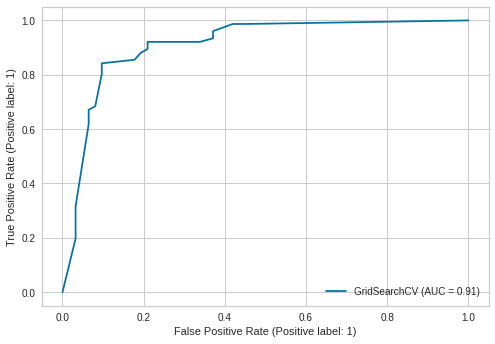

In [184]:
plot_roc_curve(DT_grid_model, X_test_scaled, y_test);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



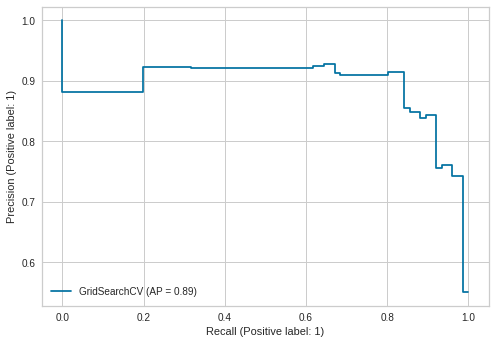

In [185]:
plot_precision_recall_curve(DT_grid_model, X_test_scaled, y_test);

###**3. Random Forest Classifier**###

In [186]:
accuracy_scores

,LR_Acc,DT_Acc,RF_Acc,KNN_Acc
Basic,0.870513,1.000000,0.989744,0.833333
Scaled,0.861538,1.000000,0.989744,0.910256
Balanced,0.865385,1.000000,0.997436,0.833333
Scaled_Balanced,0.866667,1.000000,0.997436,0.910256


**Modelling Random Forest with Default Parameters**

[[53  9]
 [ 5 71]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.85      0.88        62
           1       0.89      0.93      0.91        76

    accuracy                           0.90       138
   macro avg       0.90      0.89      0.90       138
weighted avg       0.90      0.90      0.90       138

--------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



,train_set,test_set
Accuracy,1.0,0.898551
Precision,1.0,0.887500
Recall,1.0,0.934211
f1,1.0,0.910256


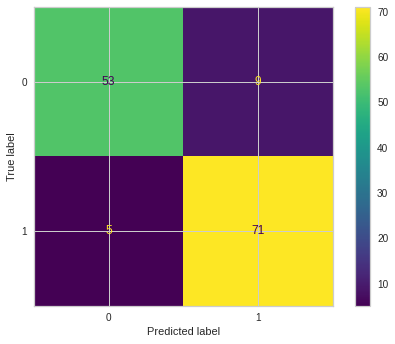

In [187]:
RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)
RF_model.fit(X_train_scaled, y_train)
y_pred = RF_model.predict(X_test_scaled)
y_train_pred = RF_model.predict(X_train_scaled)

rf_f1 = f1_score(y_test, y_pred)
rf_acc = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(RF_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

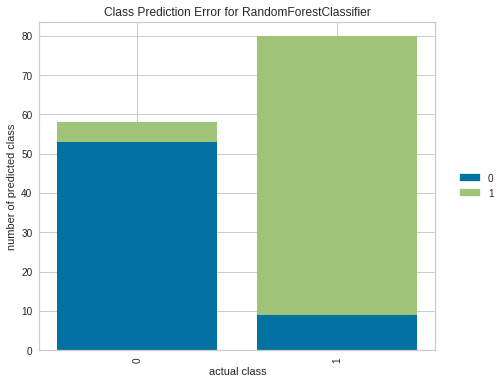

In [188]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(RF_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.poof();

**Cross-Validating Random Forest**

In [189]:
rf_xvalid_model = RandomForestClassifier(max_depth=None, random_state=101)

rf_xvalid_model_scores = cross_validate(rf_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
rf_xvalid_model_scores = pd.DataFrame(rf_xvalid_model_scores, index = range(1, 11))

rf_xvalid_model_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.171383,0.014208,0.871795,0.851064,0.930233,0.888889
2,0.171507,0.013844,0.846154,0.829787,0.906977,0.866667
3,0.176800,0.013431,0.910256,0.909091,0.930233,0.919540
4,0.168771,0.014003,0.884615,0.886364,0.906977,0.896552
5,0.175207,0.013830,0.884615,0.886364,0.906977,0.896552
6,0.170853,0.014193,0.846154,0.829787,0.906977,0.866667
7,0.174710,0.015172,0.794872,0.775510,0.883721,0.826087
8,0.172707,0.022672,0.833333,0.840909,0.860465,0.850575
9,0.171302,0.019367,0.782051,0.846154,0.750000,0.795181
10,0.175930,0.013893,0.923077,0.913043,0.954545,0.933333


In [190]:
rf_xvalid_model_scores.mean()[2:]

test_accuracy     0.857692
test_precision    0.856807
test_recall       0.893710
test_f1           0.874004
dtype: float64

**Modelling Random Forest with Best Parameters Using GridSeachCV**

In [191]:
param_grid = {'n_estimators':[50, 100, 300],
             'max_features':[2, 3, 4],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [192]:
RF_grid_model = RandomForestClassifier(random_state=101)

RF_grid_model = GridSearchCV(estimator=RF_grid_model, 
                             param_grid=param_grid, 
                             scoring = "recall", 
                             n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [193]:
print(colored('\033[1mBest Parameters of GridSearchCV for Random Forest Model:\033[0m', 'blue'), colored(RF_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for Random Forest Model:\033[0m', 'blue'), colored(RF_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for Random Forest Model: {'max_depth': 5, 'max_features': 3, 'min_samples_split': 8, 'n_estimators': 50}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for Random Forest Model: RandomForestClassifier(max_depth=5, max_features=3, min_samples_split=8,
                       n_estimators=50, random_state=101)


[[50 12]
 [ 3 73]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        62
           1       0.86      0.96      0.91        76

    accuracy                           0.89       138
   macro avg       0.90      0.88      0.89       138
weighted avg       0.90      0.89      0.89       138

--------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



,train_set,test_set
Accuracy,0.889744,0.891304
Precision,0.877729,0.858824
Recall,0.930556,0.960526
f1,0.903371,0.906832


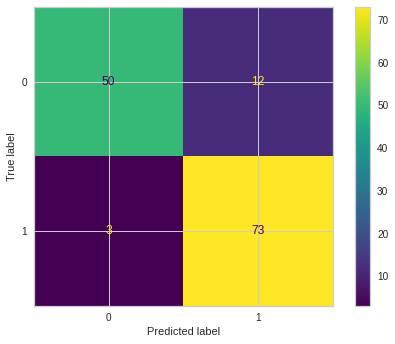

In [194]:
y_pred = RF_grid_model.predict(X_test_scaled)
y_train_pred = RF_grid_model.predict(X_train_scaled)

rf_grid_f1 = f1_score(y_test, y_pred)
rf_grid_acc = accuracy_score(y_test, y_pred)
rf_grid_recall = recall_score(y_test, y_pred)
rf_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(RF_grid_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

**Feature Importance for Random Forest Model**

In [195]:
RF_model.feature_importances_

array([0.08982893, 0.07479496, 0.10764148, 0.02468804, 0.10593903,
       0.12210332, 0.03555794, 0.03176215, 0.02549079, 0.01039822,
       0.01727643, 0.00946221, 0.09193834, 0.10527461, 0.14784354])

In [196]:
RF_feature_imp = pd.DataFrame(index = X.columns, data = RF_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
RF_feature_imp

,Feature Importance
ST_Slope_Up,0.147844
Oldpeak,0.122103
Cholesterol,0.107641
MaxHR,0.105939
ST_Slope_Flat,0.105275
ExerciseAngina_Y,0.091938
Age,0.089829
RestingBP,0.074795
Sex_M,0.035558
ChestPainType_ATA,0.031762


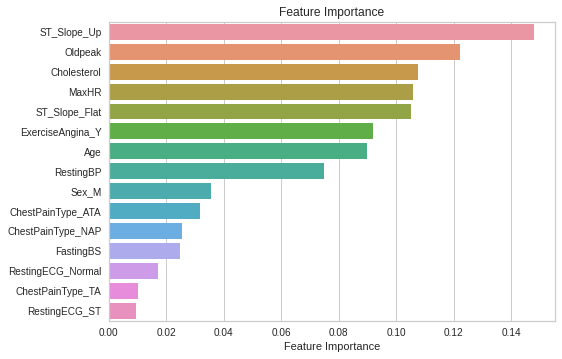

In [197]:
sns.barplot(x=RF_feature_imp["Feature Importance"], y=RF_feature_imp.index)
plt.title("Feature Importance")
plt.show()

Let's compare the results with the one's found using Decision Tree

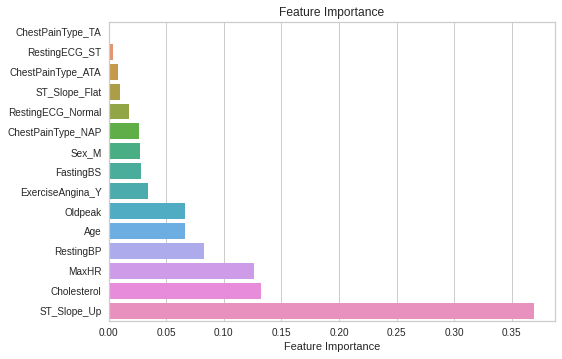

In [198]:
sns.barplot(x=DT_feature_imp["Feature Importance"], y=DT_feature_imp.index)
plt.title("Feature Importance")
plt.show()

**ROC (Receiver Operating Curve) and AUC (Area Under Curve)**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



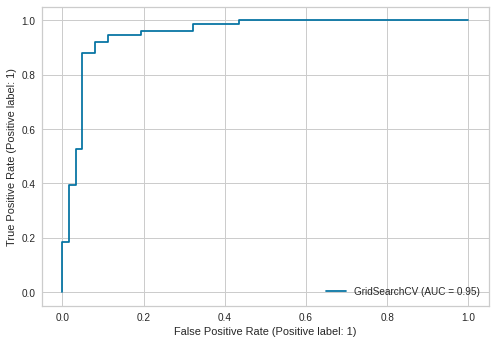

In [199]:
plot_roc_curve(RF_grid_model, X_test_scaled, y_test);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



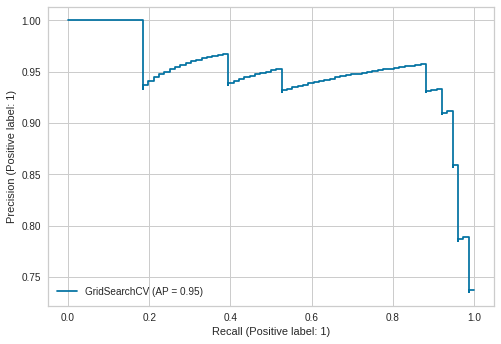

In [200]:
plot_precision_recall_curve(RF_grid_model, X_test_scaled, y_test);

**The Visualization of the Tree**

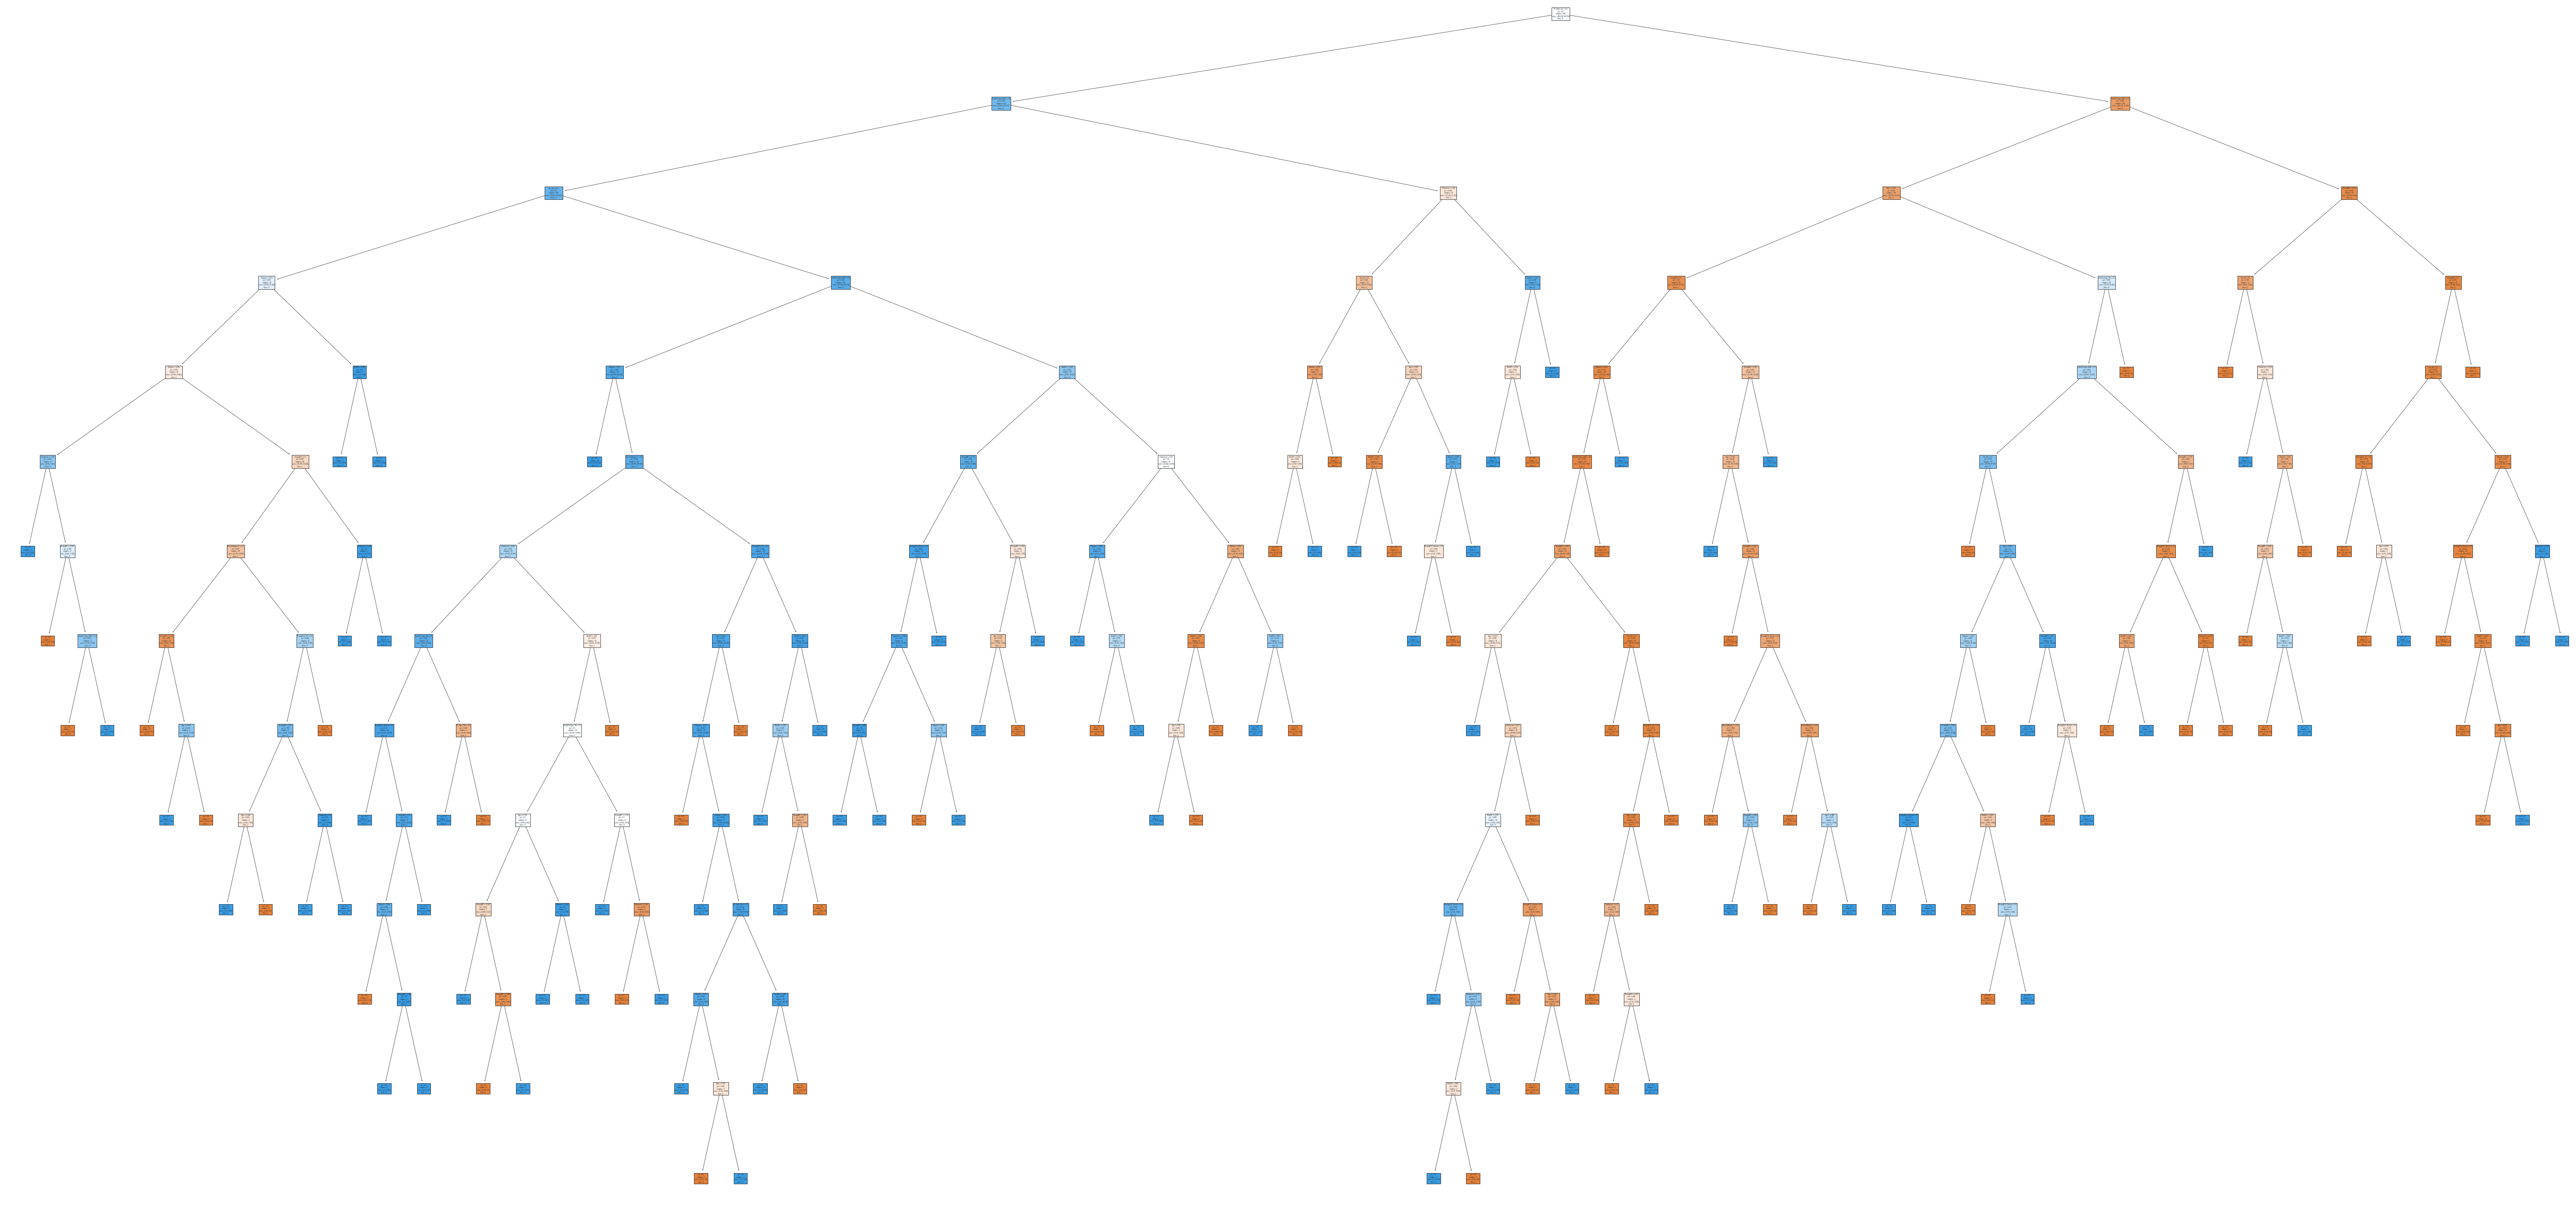

In [205]:
from sklearn.tree import plot_tree

features = list(X.columns)
targets = str(data.HeartDisease.unique())

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (20,10), dpi=150)
plot_tree(RF_model.estimators_[0],
          feature_names = features,
          class_names=targets,
          filled = True);

###**4. K-Nearest Neighbor (KNN)**###

In [206]:
accuracy_scores

,LR_Acc,DT_Acc,RF_Acc,KNN_Acc
Basic,0.870513,1.000000,0.989744,0.833333
Scaled,0.861538,1.000000,0.989744,0.910256
Balanced,0.865385,1.000000,0.997436,0.833333
Scaled_Balanced,0.866667,1.000000,0.997436,0.910256


**Modelling K-Nearest Neighbor with Default Parameters**

[[50 12]
 [10 66]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        62
           1       0.85      0.87      0.86        76

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138

--------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



,train_set,test_set
Accuracy,0.883333,0.840580
Precision,0.881432,0.846154
Recall,0.912037,0.868421
f1,0.896473,0.857143


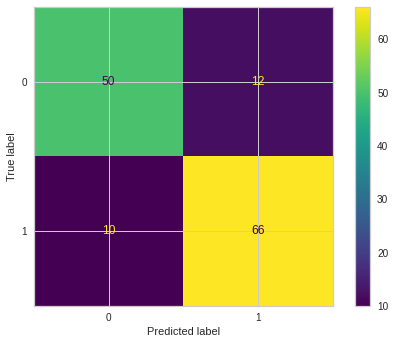

In [207]:
KNN_model = KNeighborsClassifier(n_neighbors=5, algorithm="kd_tree")
KNN_model.fit(X_train_scaled, y_train)
y_pred = KNN_model.predict(X_test_scaled)
y_train_pred = KNN_model.predict(X_train_scaled)

knn_f1 = f1_score(y_test, y_pred)
knn_acc = accuracy_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(KNN_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

In [208]:
y_pred_proba = KNN_model.predict_proba(X_test_scaled)

In [209]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.0,1.0
1,0.2,0.8
2,0.2,0.8
3,0.8,0.2
4,0.4,0.6
...,...,...
133,0.8,0.2
134,1.0,0.0
135,0.6,0.4
136,0.0,1.0


In [210]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Proba_1": y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [211]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
462,1,1,1.0,0.0
879,1,0,0.0,1.0
167,0,0,0.0,1.0
57,1,1,0.6,0.4
97,0,0,0.2,0.8
894,0,1,0.6,0.4
525,0,0,0.2,0.8
666,0,0,0.0,1.0
645,1,1,0.8,0.2
213,0,0,0.2,0.8


**Cross-Validating K-Nearest Neighbor**




In [212]:
knn_xvalid_model = KNeighborsClassifier(n_neighbors=5)

knn_xvalid_model_scores = cross_validate(knn_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
knn_xvalid_model_scores = pd.DataFrame(knn_xvalid_model_scores, index = range(1, 11))

knn_xvalid_model_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.001981,0.007903,0.807692,0.791667,0.883721,0.835165
2,0.001651,0.007454,0.858974,0.833333,0.930233,0.879121
3,0.001585,0.007462,0.923077,0.930233,0.930233,0.930233
4,0.001591,0.007478,0.820513,0.837209,0.837209,0.837209
5,0.001626,0.007434,0.923077,0.893617,0.976744,0.933333
6,0.001596,0.007470,0.820513,0.822222,0.860465,0.840909
7,0.001614,0.008990,0.871795,0.836735,0.953488,0.891304
8,0.002100,0.009546,0.858974,0.847826,0.906977,0.876404
9,0.001647,0.008000,0.833333,0.897436,0.795455,0.843373
10,0.001601,0.007464,0.935897,0.914894,0.977273,0.945055


In [213]:
knn_xvalid_model_scores.mean()[2:]

test_accuracy     0.865385
test_precision    0.860517
test_recall       0.905180
test_f1           0.881211
dtype: float64

**Elbow Method for Choosing Reasonable K Values**

In [214]:
test_error_rates = []


for k in range(1, 30):
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(X_train_scaled, y_train) 
   
    y_test_pred = KNN_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    test_error_rates.append(test_error)

In [215]:
test_error_rates

[0.1594202898550725,
 0.2246376811594203,
 0.14492753623188404,
 0.16666666666666663,
 0.1594202898550725,
 0.16666666666666663,
 0.14492753623188404,
 0.14492753623188404,
 0.14492753623188404,
 0.14492753623188404,
 0.1376811594202898,
 0.1376811594202898,
 0.13043478260869568,
 0.13043478260869568,
 0.13043478260869568,
 0.13043478260869568,
 0.1376811594202898,
 0.14492753623188404,
 0.13043478260869568,
 0.1376811594202898,
 0.13043478260869568,
 0.13043478260869568,
 0.13043478260869568,
 0.13043478260869568,
 0.1376811594202898,
 0.1376811594202898,
 0.14492753623188404,
 0.14492753623188404,
 0.1376811594202898]

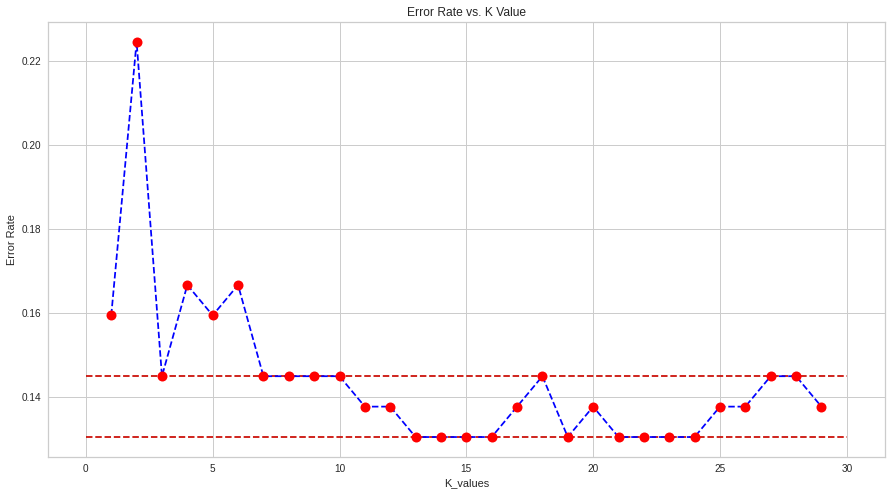

In [216]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.14492753623188404, xmin=0, xmax=30, colors='r', linestyles="--")
plt.hlines(y=0.13043478260869568, xmin=0, xmax=30, colors='r', linestyles="--");

**GridsearchCV for Choosing Reasonable K Values**

In [217]:
k_values= range(1, 30)
param_grid = {"n_neighbors": k_values, "p": [1, 2], "weights": ['uniform', "distance"]}

In [218]:
KNN_grid = KNeighborsClassifier()

In [219]:
KNN_grid_model = GridSearchCV(KNN_grid, param_grid, cv=10, scoring='accuracy')

In [220]:
KNN_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [221]:
print(colored('\033[1mBest Parameters of GridSearchCV for KNN Model:\033[0m', 'blue'), colored(KNN_grid_model.best_params_, 'cyan'))
print("--------------------------------------------------------------------------------------------------------------------")
print(colored('\033[1mBest Estimator of GridSearchCV for KNN Model:\033[0m', 'blue'), colored(KNN_grid_model.best_estimator_, 'cyan'))

Best Parameters of GridSearchCV for KNN Model: {'n_neighbors': 26, 'p': 2, 'weights': 'distance'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for KNN Model: KNeighborsClassifier(n_neighbors=26, weights='distance')


WITH K=26
-------------------
[[50 12]
 [10 66]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        62
           1       0.85      0.87      0.86        76

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138

--------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



,train_set,test_set
Accuracy,0.860256,0.840580
Precision,0.854945,0.846154
Recall,0.900463,0.868421
f1,0.877114,0.857143


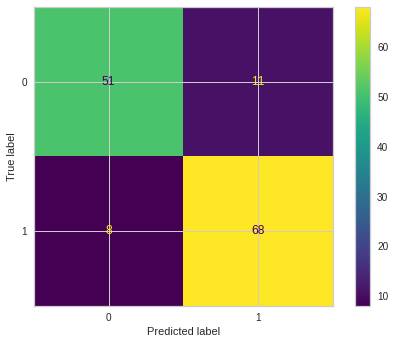

In [222]:
# With K=26

KNN_model = KNeighborsClassifier(n_neighbors=26, p=2)
KNN_model.fit(X_train_scaled, y_train)
pred = KNN_model.predict(X_test_scaled)
y_train_pred = KNN_model.predict(X_train_scaled)

knn26_f1 = f1_score(y_test, y_pred)
knn26_acc = accuracy_score(y_test, y_pred)
knn26_recall = recall_score(y_test, y_pred)
knn26_auc = roc_auc_score(y_test, y_pred)

print('WITH K=26')
print('-------------------')
print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(KNN_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

WITH K=13
-------------------
[[50 12]
 [10 66]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        62
           1       0.85      0.87      0.86        76

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138

--------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



,train_set,test_set
Accuracy,0.869231,0.840580
Precision,0.863436,0.846154
Recall,0.907407,0.868421
f1,0.884876,0.857143


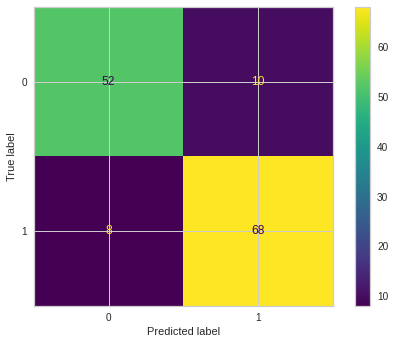

In [223]:
# With K=13

KNN_model = KNeighborsClassifier(n_neighbors=13, p=2)
KNN_model.fit(X_train_scaled, y_train)
pred = KNN_model.predict(X_test_scaled)
y_train_pred = KNN_model.predict(X_train_scaled)

knn13_f1 = f1_score(y_test, y_pred)
knn13_acc = accuracy_score(y_test, y_pred)
knn13_recall = recall_score(y_test, y_pred)
knn13_auc = roc_auc_score(y_test, y_pred)

print('WITH K=13')
print('-------------------')
print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(KNN_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

**ROC (Receiver Operating Curve) and AUC (Area Under Curve)**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



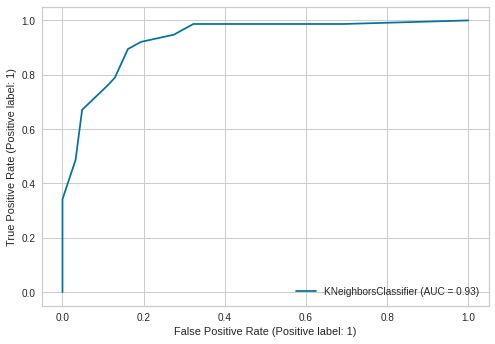

In [224]:
plot_roc_curve(KNN_model, X_test_scaled, y_test);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



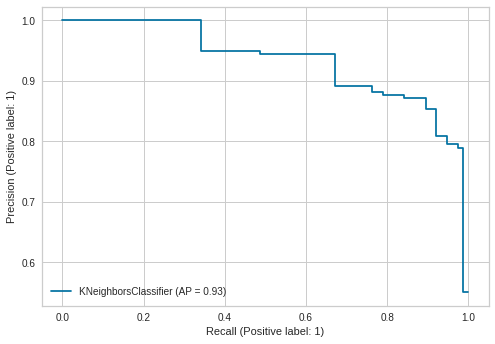

In [225]:
plot_precision_recall_curve(KNN_model, X_test_scaled, y_test);

##**The Comparison of Models**##

In [227]:
metrics_comp = [['Logistic Regression', log_f1, log_recall, log_acc, log_auc],
['Decision Tree', dt_grid_f1, dt_grid_recall, dt_grid_acc, dt_grid_auc],
['Random Forest', rf_grid_f1, rf_grid_recall, rf_grid_acc, rf_grid_auc],
['KNN', knn_f1, knn_recall, knn_acc, knn_auc]]

pd.DataFrame(data=metrics_comp, columns=['Model', 'F1_score', 'Recall', 'Accuracy', 'ROC_AUC'])

,Model,F1_score,Recall,Accuracy,ROC_AUC
0,Logistic Regression,0.891720,0.921053,0.876812,0.871817
1,Decision Tree,0.866242,0.894737,0.847826,0.842530
2,Random Forest,0.906832,0.960526,0.891304,0.883489
3,KNN,0.857143,0.868421,0.840580,0.837436


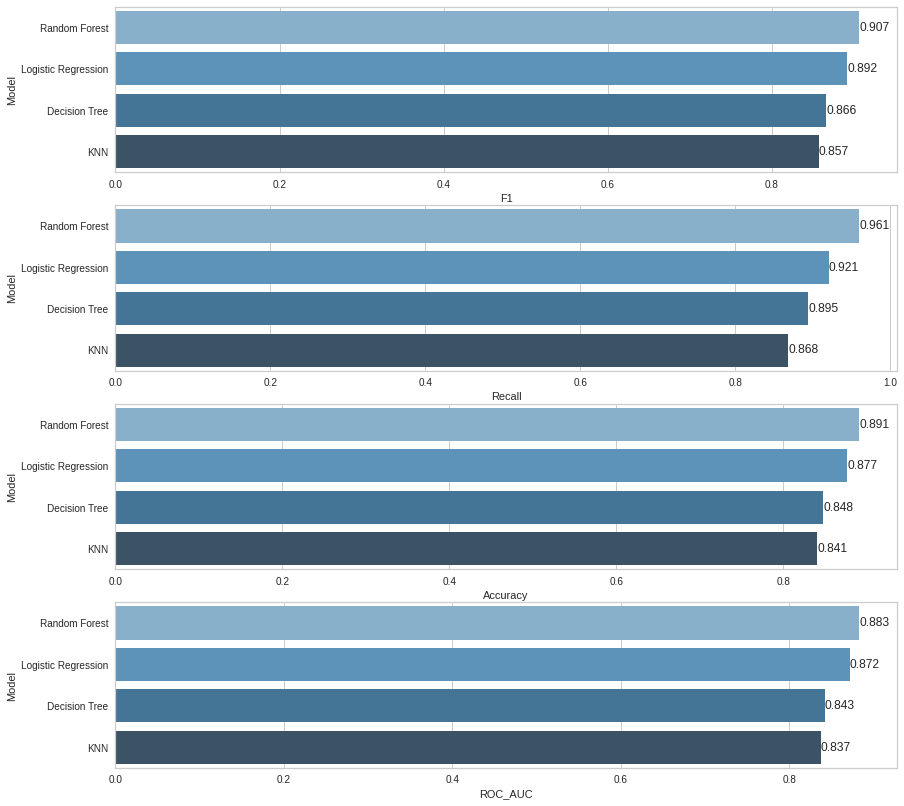

In [226]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "Decision Tree", "Random Forest", "KNN"],
                        "F1": [log_f1, dt_grid_f1, rf_grid_f1, knn_f1],
                        "Recall": [log_recall, dt_grid_recall, rf_grid_recall, knn_recall],
                        "Accuracy": [log_acc, dt_grid_acc, rf_grid_acc, knn_acc],
                        "ROC_AUC": [log_auc, dt_grid_auc, rf_grid_auc, knn_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,14))
plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.show()

Based on the findings, Random Forest Model gives the best F1 score, Accuracy, Recall and ROC values.

##**Saving the best Model**##

###**Using Pickle**###

In [248]:
import pickle
save_file = 'HeartFailurePrediction_Model.pickle'
pickle.dump(RF_model, open(save_file, 'wb'))

In [249]:
# loading from file

RF_model1 = pickle.load(open(save_file, 'rb'))
RF_model1

RandomForestClassifier(class_weight='balanced', random_state=101)

###**Using JobLib**###

In [250]:
import joblib
save_file = 'HeartFailurePrediction_Model.joblib'
joblib.dump(RF_model, open(save_file, 'wb'))

In [251]:
RF_model2 = joblib.load(save_file)
RF_model2

RandomForestClassifier(class_weight='balanced', random_state=101)